## DATA1030 Project

## Name: Zichen Zhao

## Brown University

## Link to my project github repo: [https://github.com/ZichenZhao529/DATA030_Project.git]


Dataset Shape: (42675, 17)
Columns: ['product_title', 'product_rating', 'total_reviews', 'purchased_last_month', 'discounted_price', 'original_price', 'is_best_seller', 'is_sponsored', 'has_coupon', 'buy_box_availability', 'delivery_date', 'sustainability_tags', 'product_image_url', 'product_page_url', 'data_collected_at', 'product_category', 'discount_percentage']


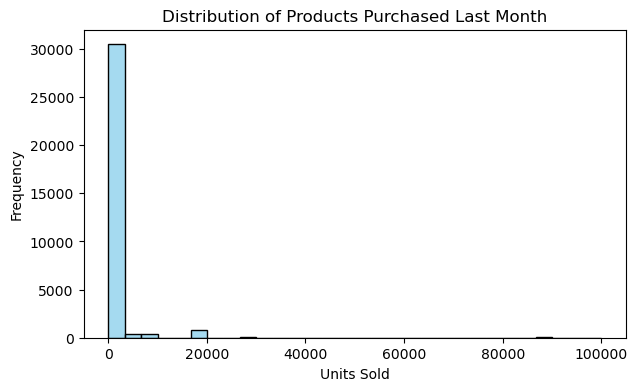

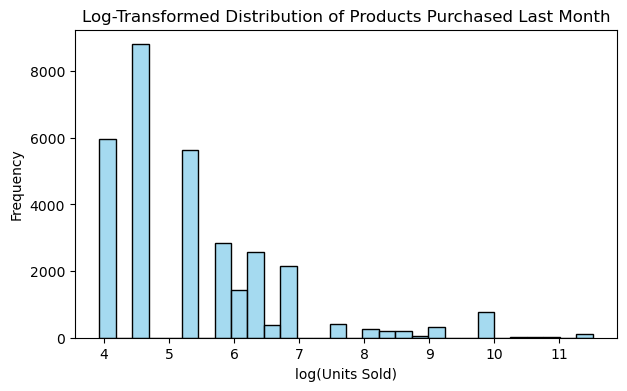

/var/folders/t2/4qybmrhj6m9ct0736s2tg40w0000gn/T/ipykernel_33896/4060219064.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='product_rating', data=df, palette='crest')


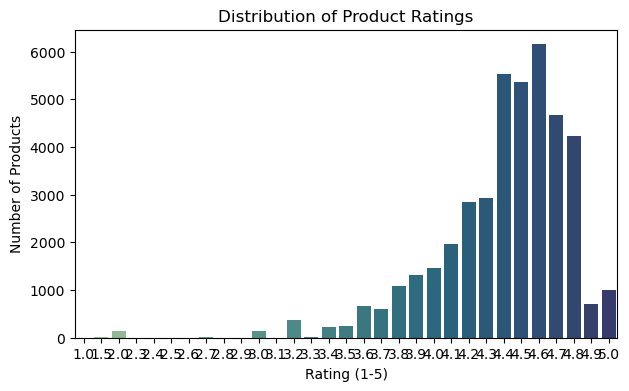

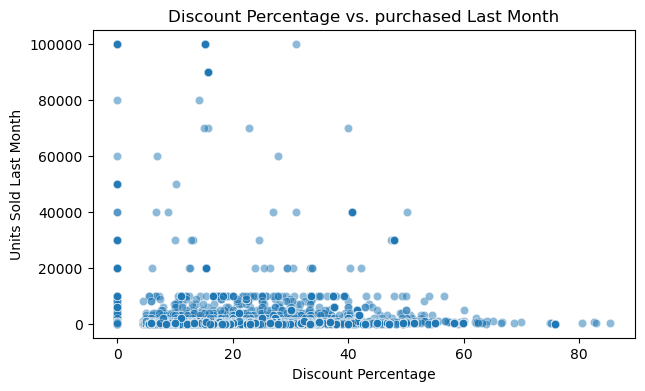

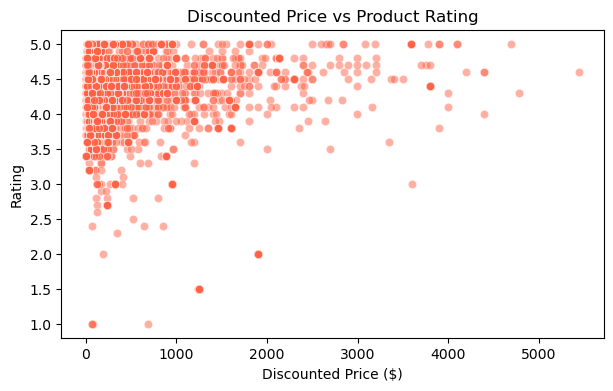

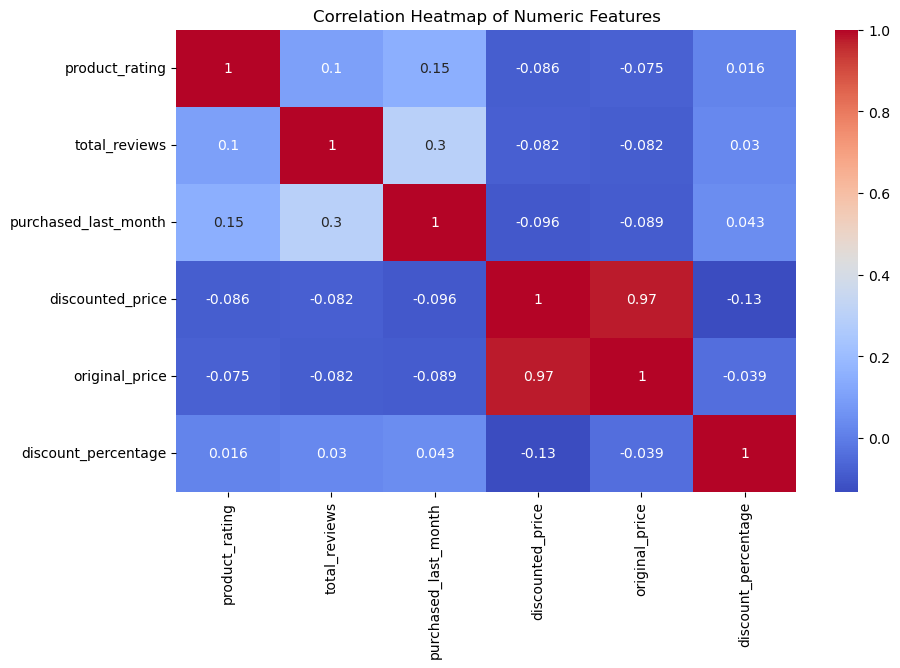

/var/folders/t2/4qybmrhj6m9ct0736s2tg40w0000gn/T/ipykernel_33896/4060219064.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


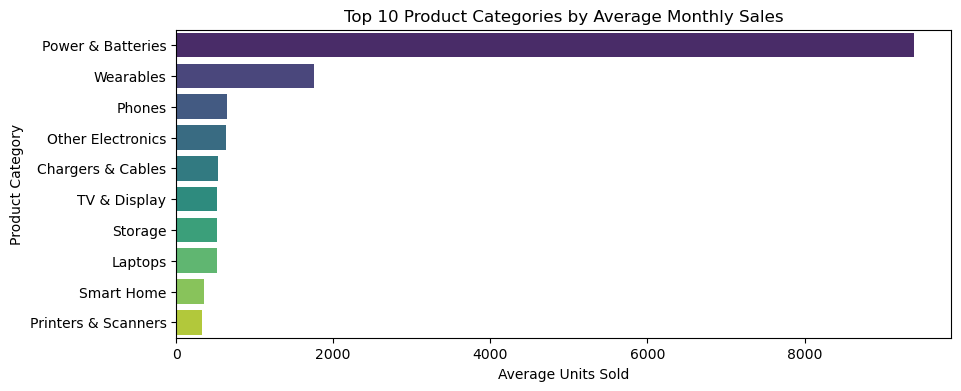

/var/folders/t2/4qybmrhj6m9ct0736s2tg40w0000gn/T/ipykernel_33896/4060219064.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


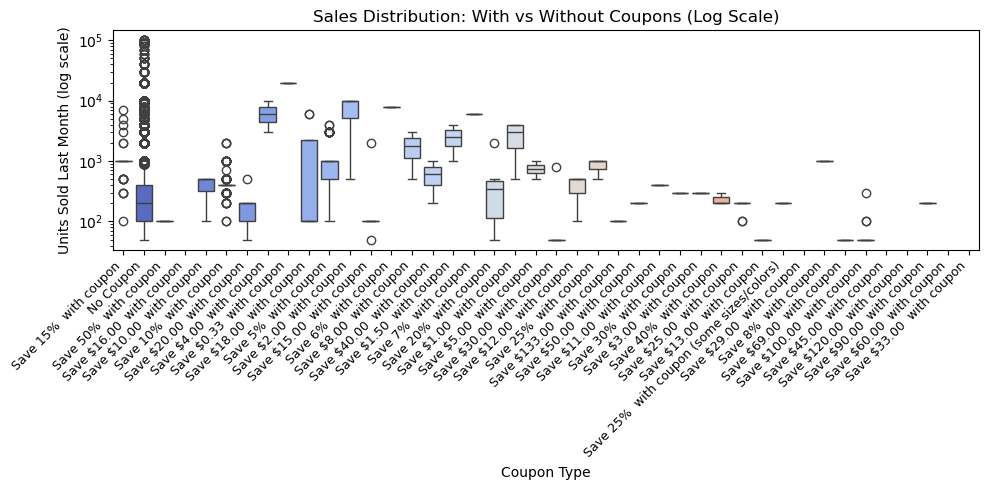

/var/folders/t2/4qybmrhj6m9ct0736s2tg40w0000gn/T/ipykernel_33896/4060219064.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_coupon', y='purchased_last_month', data=df, palette='Set2')


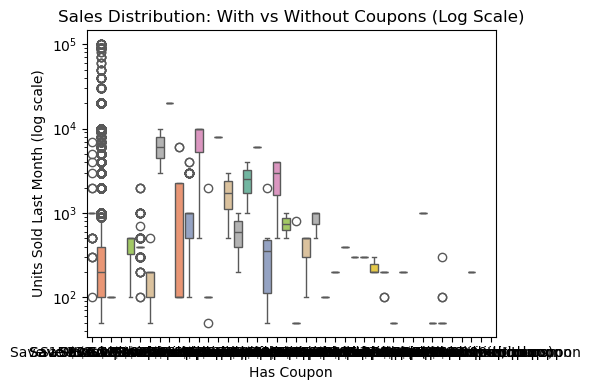

/var/folders/t2/4qybmrhj6m9ct0736s2tg40w0000gn/T/ipykernel_33896/4060219064.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_best_seller', y='purchased_last_month', data=df, palette='Set2')


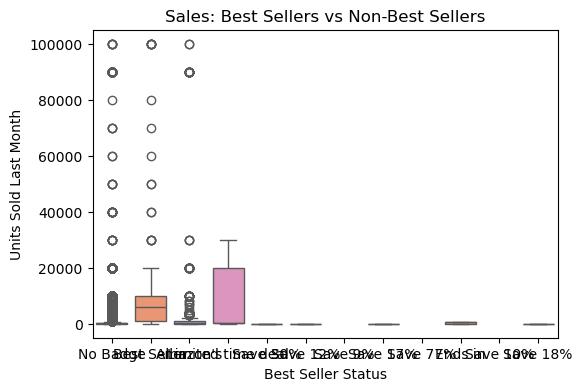

/var/folders/t2/4qybmrhj6m9ct0736s2tg40w0000gn/T/ipykernel_33896/4060219064.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_sponsored', y='purchased_last_month', data=df, palette='cool')


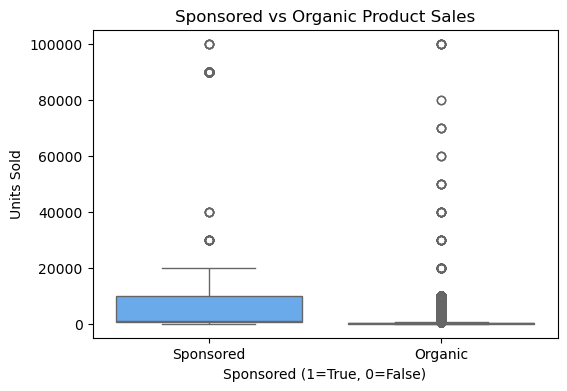

/var/folders/t2/4qybmrhj6m9ct0736s2tg40w0000gn/T/ipykernel_33896/4060219064.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_reviews', y='product_title', data=top_reviewed, palette='mako')


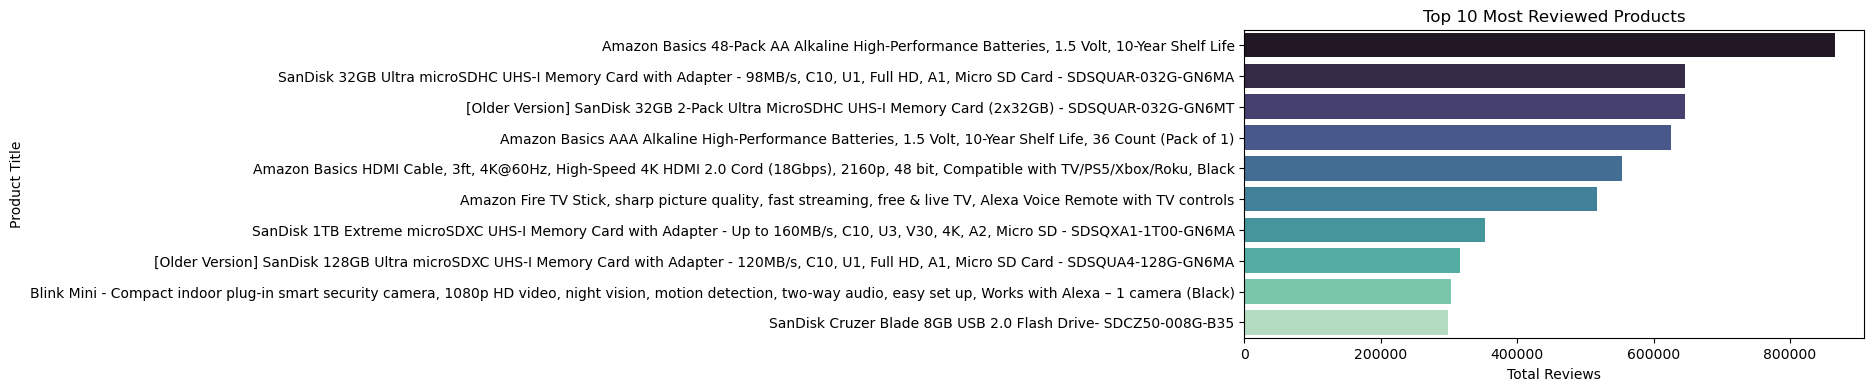

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('/Users/zichenzhao/Desktop/amazon products sales data.csv')


print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Distribution of Target Variable
plt.figure(figsize=(7,4))
sns.histplot(df['purchased_last_month'], bins=30, color='skyblue')
plt.title("Distribution of Products Purchased Last Month")
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.show()

#Log-Transformed Distribution of Products Purchased Last Month
plt.figure(figsize=(7,4))
sns.histplot(np.log1p(df['purchased_last_month']), bins=30, color='skyblue')
plt.title("Log-Transformed Distribution of Products Purchased Last Month")
plt.xlabel("log(Units Sold)")
plt.ylabel("Frequency")
plt.show()

# Product Rating Distribution
plt.figure(figsize=(7,4))
sns.countplot(x='product_rating', data=df, palette='crest')
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating (1-5)")
plt.ylabel("Number of Products")
plt.show()


# Relationship: Discount vs purchqased_last_month
plt.figure(figsize=(7,4))
sns.scatterplot(x='discount_percentage', y='purchased_last_month', data=df, alpha=0.5)
plt.title("Discount Percentage vs. purchased Last Month")
plt.xlabel("Discount Percentage")
plt.ylabel("Units Sold Last Month")
plt.show()


# Relationship: Price vs Rating
plt.figure(figsize=(7,4))
sns.scatterplot(x='discounted_price', y='product_rating', data=df, alpha=0.5, color='tomato')
plt.title("Discounted Price vs Product Rating")
plt.xlabel("Discounted Price ($)")
plt.ylabel("Rating")
plt.show()


# Correlation Heatmap (Numerical Features)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


# Sales by Product Category
plt.figure(figsize=(10,4))
top_categories = df.groupby('product_category')['purchased_last_month'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title("Top 10 Product Categories by Average Monthly Sales")
plt.xlabel("Average Units Sold")
plt.ylabel("Product Category")
plt.show()


# Effect of Coupons on Sales
plt.figure(figsize=(10,5))  # wider figure for more coupon types

sns.boxplot(
    x='has_coupon',
    y='purchased_last_month',
    data=df,
    palette='coolwarm'
)

plt.yscale('log')  # handle extreme outliers
plt.title("Sales Distribution: With vs Without Coupons (Log Scale)")
plt.xlabel("Coupon Type")
plt.ylabel("Units Sold Last Month (log scale)")
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.show()



plt.figure(figsize=(6,4))

# Use log scale for y-axis to reduce skewness from outliers
sns.boxplot(x='has_coupon', y='purchased_last_month', data=df, palette='Set2')
plt.yscale('log')
plt.title("Sales Distribution: With vs Without Coupons (Log Scale)")
plt.xlabel("Has Coupon")
plt.ylabel("Units Sold Last Month (log scale)")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# Best Seller vs Non-Best Seller
plt.figure(figsize=(6,4))
sns.boxplot(x='is_best_seller', y='purchased_last_month', data=df, palette='Set2')
plt.title("Sales: Best Sellers vs Non-Best Sellers")
plt.xlabel("Best Seller Status")
plt.ylabel("Units Sold Last Month")
plt.show()


# Sponsored Products vs Organic
plt.figure(figsize=(6,4))
sns.boxplot(x='is_sponsored', y='purchased_last_month', data=df, palette='cool')
plt.title("Sponsored vs Organic Product Sales")
plt.xlabel("Sponsored (1=True, 0=False)")
plt.ylabel("Units Sold")
plt.show()


# Top Products by Reviews
plt.figure(figsize=(8,4))
top_reviewed = df.nlargest(10, 'total_reviews')
sns.barplot(x='total_reviews', y='product_title', data=top_reviewed, palette='mako')
plt.title("Top 10 Most Reviewed Products")
plt.xlabel("Total Reviews")
plt.ylabel("Product Title")
plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

target = "purchased_last_month"
X = df.drop(columns=[target])
y = df[target]

# Identify numeric / categorical features
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object", "bool"]).columns

# Define preprocessing pipeline (Lecture 06)
num_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, train_size=0.6, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Apply preprocessing
preprocessor.fit(X_train)
X_train_prep = preprocessor.transform(X_train)
X_val_prep   = preprocessor.transform(X_val)
X_test_prep  = preprocessor.transform(X_test)

print(f"Train: {X_train_prep.shape}, Val: {X_val_prep.shape}, Test: {X_test_prep.shape}")


Train: (25605, 36803), Val: (8535, 36803), Test: (8535, 36803)


In [5]:
from sklearn.model_selection import train_test_split

# target features
target = "purchased_last_month"
X = df.drop(columns=[target])
y = df[target]

# 60% train, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, train_size=0.6, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# drop text columns
drop_cols = ["product_title", "product_image_url", "product_page_url", 
             "data_collected_at", "delivery_date"]
X = X.drop(columns=drop_cols)


In [6]:
from sklearn.impute import SimpleImputer

# missing values ---
missing_summary = X.isnull().sum()
missing_percent = (missing_summary / len(X)) * 100
print("Missing percentage per feature:\n")
print(missing_percent[missing_percent > 0])

# Seperate numeric and categorical columns 
num_missing = ["product_rating", "total_reviews", "discounted_price", 
               "original_price", "discount_percentage"]
cat_missing = ["buy_box_availability", "sustainability_tags"]

# imputers
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")
X[num_missing] = num_imputer.fit_transform(X[num_missing])
X[cat_missing] = cat_imputer.fit_transform(X[cat_missing])

# show & check
missing_summary_after = X.isnull().sum()
print("\nRemaining missing values:")
print(missing_summary_after[missing_summary_after > 0])


Missing percentage per feature:

product_rating           2.399531
total_reviews            2.399531
discounted_price         4.831869
original_price           4.831869
buy_box_availability    34.336262
sustainability_tags     92.014060
discount_percentage      4.831869
dtype: float64

Remaining missing values:
Series([], dtype: int64)


In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify feature types
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object", "bool"]).columns

# Numeric pipeline
num_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine them
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

preprocessor.fit(X_train)

X_train_prep = preprocessor.transform(X_train)
X_val_prep = preprocessor.transform(X_val)
X_test_prep = preprocessor.transform(X_test)

print("Before preprocessing:", X_train.shape)
print("After preprocessing:", X_train_prep.shape)


Before preprocessing: (25605, 16)
After preprocessing: (25605, 90)


In [10]:

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoder.fit(X[cat_features])


encoded_feature_names = encoder.get_feature_names_out(cat_features)
feature_expansion = pd.Series(
    [sum([col.startswith(f"{cat}_") for col in encoded_feature_names]) for cat in cat_features],
    index=cat_features
).sort_values(ascending=False)
print("Number of new columns created per categorical feature:\n")
print(feature_expansion)



Number of new columns created per categorical feature:

has_coupon              42
sustainability_tags     16
product_category        15
is_best_seller          12
is_sponsored             2
buy_box_availability     1
dtype: int64
